In [14]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# Load MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()

# Normalize to [0,1] and flatten
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.
x_train_flat = x_train.reshape((len(x_train), 28*28))
x_test_flat = x_test.reshape((len(x_test), 28*28))

print("x_train_flat shape:", x_train_flat.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train_flat shape: (60000, 784)


In [15]:
def build_autoencoder(latent_dim):
    input_img = keras.Input(shape=(784,))

    # Encoder
    encoded = layers.Dense(latent_dim, activation='relu')(input_img)

    # Decoder
    decoded = layers.Dense(784, activation='sigmoid')(encoded)

    autoencoder = keras.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder


In [16]:
latent_dims = [2, 10, 50]  # Vary latent space
autoencoders = {}
decoded_imgs_dict = {}

for dim in latent_dims:
    print(f"\nTraining Autoencoder with latent_dim = {dim}")
    ae = build_autoencoder(latent_dim=dim)
    ae.fit(x_train_flat, x_train_flat,
           epochs=10, batch_size=256,
           shuffle=True,
           validation_data=(x_test_flat, x_test_flat),
           verbose=1)

    autoencoders[dim] = ae
    decoded_imgs_dict[dim] = ae.predict(x_test_flat)



Training Autoencoder with latent_dim = 2
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.5586 - val_loss: 0.2796
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2767 - val_loss: 0.2659
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2624 - val_loss: 0.2538
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2525 - val_loss: 0.2498
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2490 - val_loss: 0.2474
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2473 - val_loss: 0.2453
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2449 - val_loss: 0.2436
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2429 - val_loss: 0.2421
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2424 - val_loss: 0.2411
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2418 - val_loss: 0.2401
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Training Autoencoder with latent_dim = 10
Epoch 1/10
23

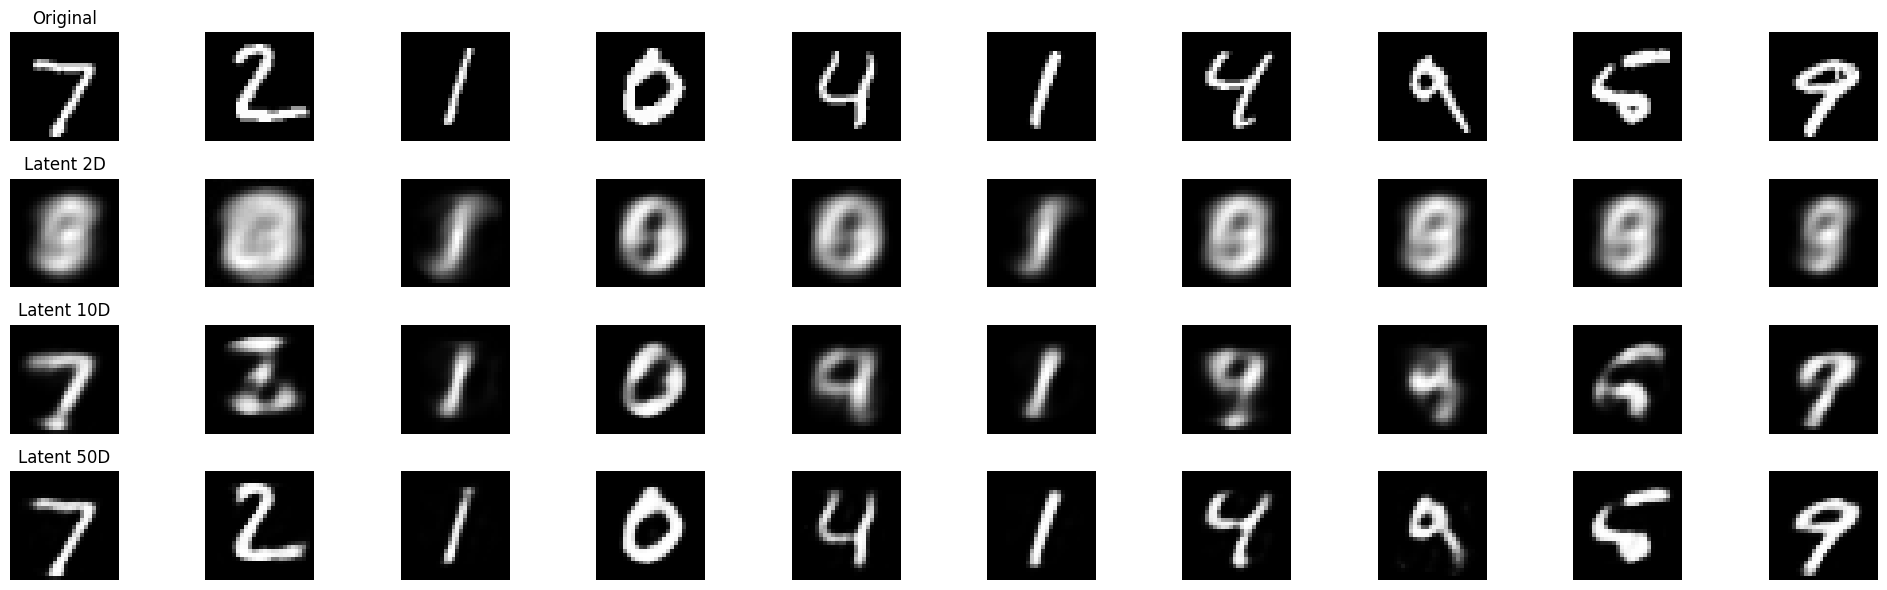

In [17]:
n = 10  # number of images to display
plt.figure(figsize=(20, 6))

for i in range(n):
    # Original images
    ax = plt.subplot(len(latent_dims)+1, n, i+1)
    plt.imshow(x_test[i], cmap='gray')
    ax.axis('off')
    if i == 0: ax.set_title("Original")

    # Reconstructions for each latent dim
    for j, dim in enumerate(latent_dims):
        ax = plt.subplot(len(latent_dims)+1, n, i+1 + (j+1)*n)
        plt.imshow(decoded_imgs_dict[dim][i].reshape(28,28), cmap='gray')
        ax.axis('off')
        if i == 0:
            ax.set_title(f"Latent {dim}D")

plt.tight_layout()
plt.show()
